Основные цели и задачи проекта:
Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.
Задачи:
- Произвести первичную обработку данных
- Устранить выбросы, если таковые имеются
- Для численных перменных произвести корреляционный анализ, устранить те, которые не влияют на предсказываемую величину
- Проанализировать номинативные переменные, устранить те, которые не влияют на предсказываемую величину

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

### Первичная обработка данных

In [2]:
df = pd.read_csv('stud_math.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

В наших данных 394 строки и 30 столбцов (признаков). 17 из 30 стобцов - категориальные. 13 - численные.

In [4]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

### school

school — аббревиатура школы, в которой учится ученик

In [5]:
df.school.isna().value_counts()

False    395
Name: school, dtype: int64

In [6]:
df.school.value_counts()

GP    349
MS     46
Name: school, dtype: int64

Столбец не имеет пропусков и имеет всего два уникальных значения. 

### sex

In [7]:
df.sex.isna().value_counts()

False    395
Name: sex, dtype: int64

In [8]:
df.sex.value_counts()

F    208
M    187
Name: sex, dtype: int64

Столбец не имеет пропусков и имеет всего два уникальных значения c примерно равным кол-вом появления в данных.

### age

In [9]:
df.age.isna().value_counts()

False    395
Name: age, dtype: int64

Этот столбец числовой и без пропусков. Поэтому посмотрим на его распределение:

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

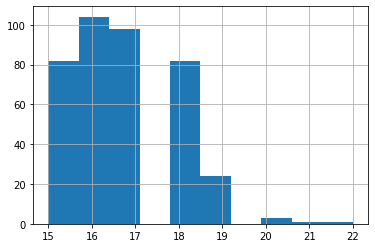

In [10]:
df.age.hist()
df.age.describe()

In [11]:
df.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

Видим, что подавляющее кол-во значений возраста лежит в интервале 15-19 лет. А так же имеются несколько значений в интервале 20-22. 


In [12]:
print('Процент данных со значением возраста от 20 до 22 лет: ',len(df.loc[(df['age'] >=20) & (df['age'] <=22)])/len(df)*100,'%')

Процент данных со значением возраста от 20 до 22 лет:  1.2658227848101267 %


Т.к. процент этих данных очень мал и для модели не будет играть существенной роли, можем удалить его из общей выборки.

In [13]:
#Передаем ф функиию drop значения индексов тех строк, в которых значение признака age лежит в интервале [20,22] 
df.drop(df.loc[(df['age'] >=20) & (df['age'] <=22)].index, axis = 0, inplace = True)
df.shape

(390, 30)

### address

address — тип адреса ученика ('U' - городской, 'R' - за городом)

In [14]:
display(df.address.value_counts())
print('Кол-во пропусков: ', df.address.isna().sum())

U    292
R     82
Name: address, dtype: int64

Кол-во пропусков:  16


Итак, у нас имеются 16 пропусков и 2 уникальных значения. Заполнение пропусков каким либо из двух уникальных значений было бы не неправильным, потому что нет глобального доминирования одного значения над другим. Поэтому придется просто удалить строки с пропусками.

In [15]:
df.drop(df[df.address.isna() == True].index, axis = 0, inplace = True)
df.shape

(374, 30)

### famsize

famsize — размер семьи('LE3' <= 3, 'GT3' >3)

In [16]:
display(df.famsize.value_counts())
print('Кол-во пропусков: ', df.famsize.isna().sum())

GT3    248
LE3    100
Name: famsize, dtype: int64

Кол-во пропусков:  26


26 пропусков, два уникальных значения, доминирования одного значения над другим - нет. Удаляем строки с пропусками.

In [17]:
df.drop(df[df.famsize.isna() == True].index, axis = 0, inplace = True)
df.shape

(348, 30)

### Pstatus

Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

In [18]:
display(df.Pstatus.value_counts())
print('Кол-во пропусков: ', df.Pstatus.isna().sum())

T    279
A     29
Name: Pstatus, dtype: int64

Кол-во пропусков:  40


40 пропусков, два уникальных значения. 
- 1 факт: одного значения много больше чем второго. 
- 2 факт: 40 пропусков - это достаточно много при общем кол-ве строк 390. 

Поэтому имеет смысл заменить пустые значения наиболее встречающимся в данных. 
##### Важное примечание
Перед принятием решений удалять строки с пропусками или заполнить их чем-либо, просматриваются все остальные признаки. По причине того, что могут встретиться "логически связанные признаки" и таким образом в столбце с этим логически связанным признаком окажется подходящая по здравому смыслу замена пропуску.

In [19]:
#Заменяем пропуски наиболее часто встречающимся значением в столбце
df.fillna(df.Pstatus.value_counts().index[0], inplace = True)

### Medu

Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [20]:
display(df.Medu.value_counts())
print('Кол-во пропусков: ', df.Medu.isna().sum())

4.0    115
3.0     89
2.0     87
1.0     52
0.0      3
T        2
Name: Medu, dtype: int64

Кол-во пропусков:  0


Пропусков нет. Два выброса с неккоректным значением "Т". Выведим строки, в которых Medu = 'T'.

In [21]:
pd.set_option('display.max_columns', 50)
df[df['Medu'] == "T"]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
193,GP,M,16,R,GT3,T,T,3,services,services,reputation,mother,1,1,0,no,yes,no,yes,yes,-3,yes,yes,no,4,3,2,5,8,50
239,GP,M,18,U,GT3,T,T,2,other,services,reputation,father,1,2,1,no,no,no,no,yes,-6,no,T,T,5,5,4,2,0,0


Заметим что одна строка малоинформативна (часто встречается выброс "T" даже в ругих стобцах). Удаляем строку.

In [22]:
df.drop(239, axis = 0, inplace = True)

Другая строка с хорошими данными (жалко удалять). В данных присутствует признак Mjob - работа матери, который скорее всего связан с нашим признаком. В нашей строке он имеет значение 'services'. Заменим пропуск наиболее встречающимся значением в строках с признаком Mjob = 'services'

In [23]:
medu_at_services = df[df.Mjob == 'services']['Medu'].value_counts()
medu_at_services

3.0    35
2.0    26
4.0    21
1.0     5
T       1
Name: Medu, dtype: int64

In [24]:
df.Medu = df.Medu.apply(lambda x: medu_at_services.index[0] if x == 'T' else x)

### Fedu

Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [25]:
display(df.Fedu.value_counts())
print('Кол-во пропусков: ', df.Fedu.isna().sum())

2.0     93
3.0     88
4.0     81
1.0     62
T       21
40.0     1
0.0      1
Name: Fedu, dtype: int64

Кол-во пропусков:  0


0 пропусков. 21 выброс 'T' и один выброс 40. Скорее всего при вводе данных произошла ошибка и добавлен лишняя цифра 0, меняем 40 на 4.

In [26]:
#Удостоверимся что строка в целом информативна
df[df.Fedu == 40]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
11,GP,F,15,U,GT3,T,2.0,40,services,other,reputation,father,3,3,0,no,yes,no,yes,yes,-9,yes,yes,no,5,2,2,4,4,60


In [27]:
df.Fedu = df.Fedu.apply(lambda x: 4 if x == 40 else x)

In [28]:
def emission_replacement():
    """
    Возвращает df с замененными значениями признака 'Fedu' = 'T' на наиболее 
    часто встречаемые значения 'Fedu' соответствующего 'Fjob'
    """
    df1 = df.copy()
    for index in df.index:
        if df1.loc[index]['Fedu'] == 'T':
            job = df1.loc[index, 'Fjob']
            jobs = df1.loc[df1.Fjob == job]
            df.loc[index, 'Fedu'] = jobs['Fedu'].value_counts().index[0]
    return df

In [29]:
df = emission_replacement()

In [30]:
#Проверяем что не осталось выбросов
display(df.Fedu.value_counts())

2.0    103
3.0     94
4.0     87
1.0     62
0.0      1
Name: Fedu, dtype: int64

In [31]:
df.Fedu = df.Fedu.apply(lambda x: float(x))

### Mjob

Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [32]:
display(df.Mjob.value_counts())
print('Кол-во пропусков: ', df.Mjob.isna().sum())

other       117
services     88
at_home      50
teacher      48
health       27
T            17
Name: Mjob, dtype: int64

Кол-во пропусков:  0


0 пропусков. 17 выбросов 'Т'. Заменим выбросы на самое встречающееся значение (other). Удалять строки с выбросами не совсем рационально, потому что в целом признак может быть признан неприносящим вклад в модель, а вот значения других признаков таких строк может быть нужной.

In [33]:
df.Mjob = df.Mjob.apply(lambda x: df.Mjob.value_counts().index[0] if x == 'T' else x)

### Fjob

Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [34]:
display(df.Fjob.value_counts())
print('Кол-во пропусков: ', df.Fjob.isna().sum())

other       168
services     89
T            35
teacher      27
health       15
at_home      13
Name: Fjob, dtype: int64

Кол-во пропусков:  0


Вывод такой же как и в случае с Mjob. Сделаем тоже самое

In [35]:
df.Fjob = df.Fjob.apply(lambda x: df.Fjob.value_counts().index[0] if x == 'T' else x)

### reason

reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [36]:
display(df.reason.value_counts())
print('Кол-во пропусков: ', df.reason.isna().sum())

course        118
reputation     91
home           90
other          31
T              17
Name: reason, dtype: int64

Кол-во пропусков:  0


Вывод такой же как и в случае с Mjob и Fjob. Сделаем тоже самое

In [37]:
df.reason = df.reason.apply(lambda x: df.reason.value_counts().index[0] if x == 'T' else x)

### guardian

guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [38]:
display(df.guardian.value_counts())
print('Кол-во пропусков: ', df.guardian.isna().sum())

mother    219
father     78
T          26
other      24
Name: guardian, dtype: int64

Кол-во пропусков:  0


In [39]:
df.guardian = df.guardian.apply(lambda x: df.guardian.value_counts().index[0] if x == 'T' else x)

### traveltime

traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [40]:
display(df.traveltime.value_counts())
print('Кол-во пропусков: ', df.traveltime.isna().sum())

1.0    214
2.0     84
T       24
3.0     19
4.0      6
Name: traveltime, dtype: int64

Кол-во пропусков:  0


Заменим выбросы на самое встречающееся значение

In [41]:
df.traveltime = df.traveltime.apply(lambda x: df.traveltime.value_counts().index[0] if x == 'T' else x)

### studytime

studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [42]:
display(df.studytime.value_counts())
print('Кол-во пропусков: ', df.studytime.isna().sum())

2.0    169
1.0     90
3.0     56
4.0     26
T        6
Name: studytime, dtype: int64

Кол-во пропусков:  0


In [43]:
df.studytime = df.studytime.apply(lambda x: df.studytime.value_counts().index[0] if x == 'T' else x)

### failures

failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)

In [44]:
display(df.failures.value_counts())
print('Кол-во пропусков: ', df.failures.isna().sum())

0.0    264
1.0     42
T       18
2.0     12
3.0     11
Name: failures, dtype: int64

Кол-во пропусков:  0


In [45]:
df.failures = df.failures.apply(lambda x: df.failures.value_counts().index[0] if x == 'T' else x)

### schoolsup

schoolsup — дополнительная образовательная поддержка (yes или no)

In [46]:
display(df.schoolsup.value_counts())
print('Кол-во пропусков: ', df.schoolsup.isna().sum())

no     294
yes     46
T        7
Name: schoolsup, dtype: int64

Кол-во пропусков:  0


In [47]:
df.schoolsup = df.schoolsup.apply(lambda x: df.schoolsup.value_counts().index[0] if x == 'T' else x)

### famsup

famsup — семейная образовательная поддержка (yes или no)

In [48]:
display(df.famsup.value_counts())
print('Кол-во пропусков: ', df.famsup.isna().sum())

yes    197
no     119
T       31
Name: famsup, dtype: int64

Кол-во пропусков:  0


In [49]:
df.famsup = df.famsup.apply(lambda x: df.famsup.value_counts().index[0] if x == 'T' else x)

### paid 

paid — дополнительные платные занятия по математике (yes или no)

In [50]:
display(df.paid.value_counts())
print('Кол-во пропусков: ', df.paid.isna().sum())

no     173
yes    137
T       37
Name: paid, dtype: int64

Кол-во пропусков:  0


In [51]:
df.paid = df.paid.apply(lambda x: df.paid.value_counts().index[0] if x == 'T' else x)

### activities

activities — дополнительные внеучебные занятия (yes или no)

In [52]:
display(df.activities.value_counts())
print('Кол-во пропусков: ', df.activities.isna().sum())

yes    172
no     161
T       14
Name: activities, dtype: int64

Кол-во пропусков:  0


In [53]:
df.activities = df.activities.apply(lambda x: df.activities.value_counts().index[0] if x == 'T' else x)

### nursery

nursery — посещал детский сад (yes или no)

In [54]:
display(df.nursery.value_counts())
print('Кол-во пропусков: ', df.nursery.isna().sum())

yes    266
no      68
T       13
Name: nursery, dtype: int64

Кол-во пропусков:  0


In [55]:
df.nursery = df.nursery.apply(lambda x: df.nursery.value_counts().index[0] if x == 'T' else x)

### higher

higher — хочет получить высшее образование (yes или no)

In [56]:
display(df.higher.value_counts())
print('Кол-во пропусков: ', df.higher.isna().sum())

yes    315
T       17
no      15
Name: higher, dtype: int64

Кол-во пропусков:  0


In [57]:
df.higher = df.higher.apply(lambda x: df.higher.value_counts().index[0] if x == 'T' else x)

### internet 

internet — наличие интернета дома (yes или no)

In [58]:
display(df.internet.value_counts())
print('Кол-во пропусков: ', df.internet.isna().sum())

yes    269
no      47
T       31
Name: internet, dtype: int64

Кол-во пропусков:  0


In [59]:
df.internet = df.internet.apply(lambda x: df.internet.value_counts().index[0] if x == 'T' else x)

### romantic

romantic — в романтических отношениях (yes или no)

In [60]:
display(df.romantic.value_counts())
print('Кол-во пропусков: ', df.romantic.isna().sum())

no     214
yes    106
T       27
Name: romantic, dtype: int64

Кол-во пропусков:  0


In [61]:
df.romantic = df.romantic.apply(lambda x: df.romantic.value_counts().index[0] if x == 'T' else x)

### famrel

famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

In [62]:
display(df.famrel.value_counts())
print('Кол-во пропусков: ', df.famrel.isna().sum())

4.0     165
5.0      82
3.0      53
T        23
2.0      16
1.0       7
-1.0      1
Name: famrel, dtype: int64

Кол-во пропусков:  0


In [63]:
df.drop(df.loc[df['famrel'] == -1].index, axis = 0, inplace = True)

In [64]:
df.famrel = df.famrel.apply(lambda x: df.famrel.value_counts().index[0] if x == 'T' else x)

### freetime

freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

In [65]:
display(df.freetime.value_counts())
print('Кол-во пропусков: ', df.freetime.isna().sum())

3.0    138
4.0     97
2.0     58
5.0     27
1.0     17
T        9
Name: freetime, dtype: int64

Кол-во пропусков:  0


In [66]:
df.freetime = df.freetime.apply(lambda x: df.freetime.value_counts().index[0] if x == 'T' else x)

### goout

goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

In [67]:
display(df.goout.value_counts())
print('Кол-во пропусков: ', df.goout.isna().sum())

3.0    112
2.0     91
4.0     76
5.0     43
1.0     20
T        4
Name: goout, dtype: int64

Кол-во пропусков:  0


In [68]:
df.goout = df.goout.apply(lambda x: df.goout.value_counts().index[0] if x == 'T' else x)

### health

health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

In [69]:
display(df.health.value_counts())
print('Кол-во пропусков: ', df.health.isna().sum())

5.0    119
3.0     78
4.0     54
1.0     42
2.0     38
T       15
Name: health, dtype: int64

Кол-во пропусков:  0


In [70]:
df.health = df.health.apply(lambda x: df.health.value_counts().index[0] if x == 'T' else x)

### absences

absences — количество пропущенных занятий

In [71]:
display(df.absences.value_counts())
print('Кол-во пропусков: ', df.absences.isna().sum())

0.0      96
2.0      56
4.0      46
6.0      28
8.0      17
10.0     15
12.0     10
14.0     10
T         8
3.0       7
7.0       6
16.0      6
5.0       5
18.0      5
1.0       3
20.0      3
9.0       3
22.0      2
15.0      2
13.0      2
11.0      2
75.0      1
385.0     1
56.0      1
54.0      1
21.0      1
23.0      1
24.0      1
25.0      1
26.0      1
28.0      1
38.0      1
40.0      1
19.0      1
17.0      1
Name: absences, dtype: int64

Кол-во пропусков:  0


Видим, что есть достаточно много редковстречающихся значений, которые врядли смогут сделать адекватный вклад в модель. Удалим строки со значениями которые появляются меньше 5 раз.

In [72]:
df1 = pd.DataFrame(df.absences.value_counts())
df1 = df1[df1.absences < 5]

In [73]:
df.absences = df.absences.apply(lambda x: df.absences.value_counts().index[0] if x == 'T' else None if x in df1.index else x)

In [74]:
df.drop(df[df.absences.isna() == True].index, axis = 0, inplace = True)

### score (целевая переменная)

score — баллы по госэкзамену по математике

In [75]:
display(df.score.value_counts())
print('Кол-во пропусков: ', df.score.isna().sum())

50.0     43
55.0     38
0.0      32
70.0     27
75.0     25
60.0     25
65.0     25
40.0     20
45.0     20
30.0     12
80.0     12
35.0      8
90.0      7
25.0      6
85.0      5
95.0      5
T         4
100.0     1
Name: score, dtype: int64

Кол-во пропусков:  0


Т.к. признак является целевой переменной, то правильнее удалить строки с выбросами нежели заполнять их чем-либо.

In [76]:
df.score = df.score.apply(lambda x: None if x == 'T' else x)

In [77]:
df.drop(df[df.score.isna() == True].index, axis = 0, inplace = True)

### studytime, granular

Неизвестный признак без описания. Возможно ситуация прояснится после корреляционного анализа. Выбросы заменим таким же образом как и в предыдущих случаях.

In [78]:
df['studytime, granular'].value_counts()

-6.0     146
-3.0      85
-9.0      49
-12.0     25
T          6
Name: studytime, granular, dtype: int64

In [79]:
df['studytime, granular'] = df['studytime, granular'].apply(lambda x: df['studytime, granular'].value_counts().index[0] if x == 'T' else x)

## Корреляционный анализ

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 1 to 394
Data columns (total 30 columns):
school                 311 non-null object
sex                    311 non-null object
age                    311 non-null int64
address                311 non-null object
famsize                311 non-null object
Pstatus                311 non-null object
Medu                   311 non-null float64
Fedu                   311 non-null float64
Mjob                   311 non-null object
Fjob                   311 non-null object
reason                 311 non-null object
guardian               311 non-null object
traveltime             311 non-null float64
studytime              311 non-null float64
failures               311 non-null float64
schoolsup              311 non-null object
famsup                 311 non-null object
paid                   311 non-null object
activities             311 non-null object
nursery                311 non-null object
studytime, granular    311 non-

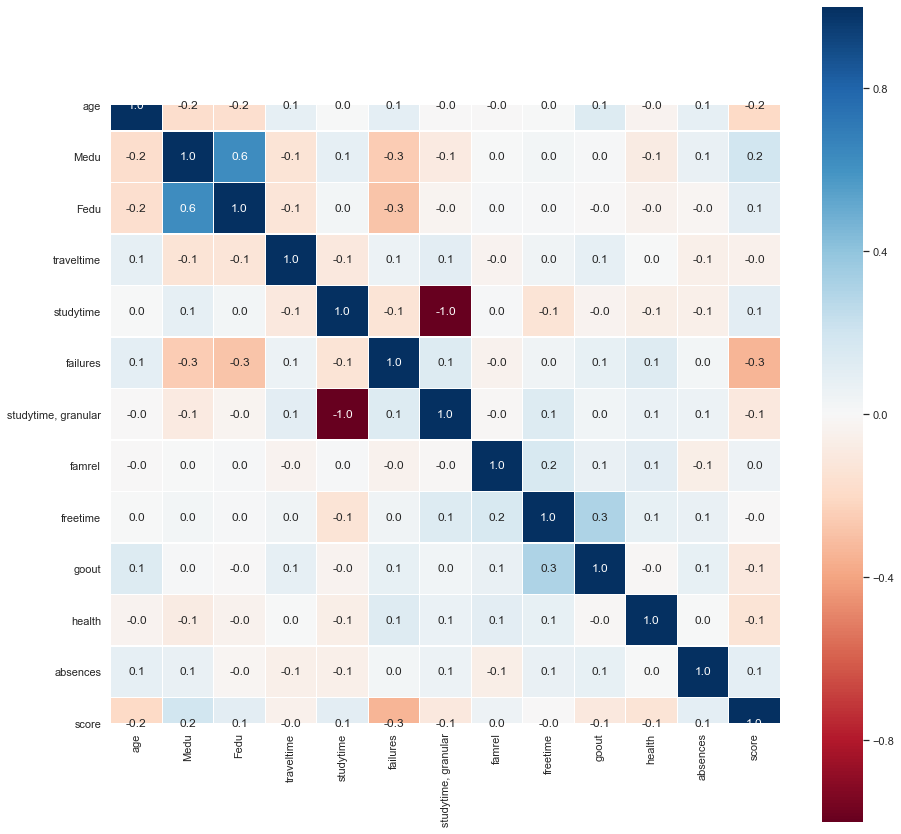

In [81]:
#Для большей наглядности построим heatmap
sns.set(font_scale=1)
plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), square=True,
              annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu")

Признак studytime, granural сильно скоррелирован с признаком studytime. Оставляем только studytime. У остальных признаков критической корреляции нет.

In [82]:
df.drop(['studytime, granular'], axis = 1, inplace = True)

Посмотрим на корреляцию с целевым признаком score и попробуем сделать некоторые выводы

In [83]:
df.corr().score

age          -0.198106
Medu          0.191297
Fedu          0.107146
traveltime   -0.049563
studytime     0.103149
failures     -0.342799
famrel        0.048748
freetime     -0.001169
goout        -0.104067
health       -0.134065
absences      0.099612
score         1.000000
Name: score, dtype: float64

- Сразу можно заметить что максимальный модуль коэффициента корреляции среди всех признаков примерно равен 0.3, что собственно не очень много. Таким образом признак failures (количество внеучебных неудач) будет вносить основной вклад в обучение модели. Стоит заметить, что коээфициент корреляции имеет отрицательный знак, а это значит что чем больше у студента внеучебных неудач, тем ниже может быть его оценка по экзамену.
- Самый малый (по модулю) коэфф. у признака freetime (свободное время после школы) примерно -0.001. Зависимость между оценкой по экзамену и свободным временем после школы очень мала. Задействовать признак в обучении модели не имеет особого смысла.
- Образование матери больше влияет на балл по экзамену по сравнению с образованием отца. Скроее всего это связано с тем, что матери чуть больше занимаются со своими детьми.

Остальные признаки:
- с отрицательным коэфф-ом. age, traveltime, goout, health. Таким образом чем больше возраст ученика, время в пути до школы, время, проведенное с друзьями, а также чем лучше текущее состояние здоровья, тем ниже оценка по экзамену.
- с положительным коээф-ом. Medu, Fedu, studytime, famrel, absences. Рост уровня образования родителей, времени на учебу помимо школы, семейных отношений положительно сказывается на балл по экзамену.
- странно, что кол-во пропущенных занятий положительно сказываются на сдаче экзамена, хоть и в небольшой степени.

Для дальнейшего построения модели выберем наиболее зависимые признаки с целевым, а именно: age, Medu, Fedu, studytime, failures, goout, health, absences.

## Анализ номинативных переменных

Для анализа номинативных переменных будет использовать box-plot. С помощью этой функции мы построим графики плотности распределения переменных, и таким образом мы сможем визуально оценить/сравнить значения признаков и их влияние на целевую переменную score.  

In [84]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (10, 4))
    sns.boxplot(x=column, y='score', data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:10])], ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

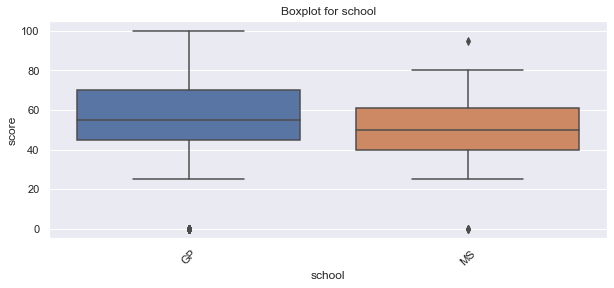

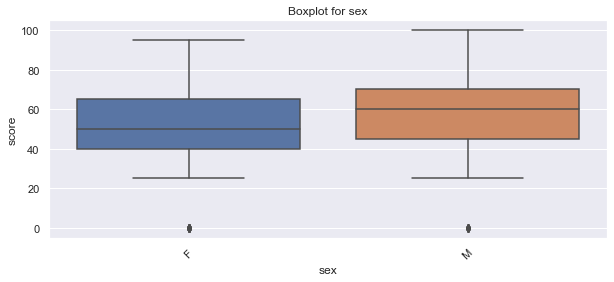

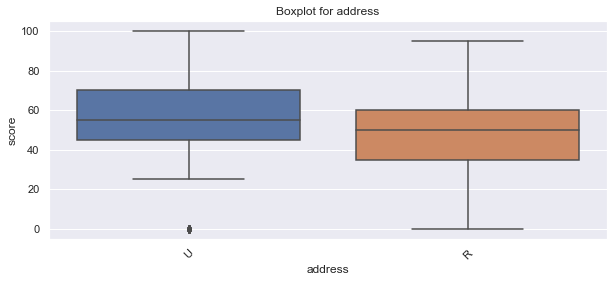

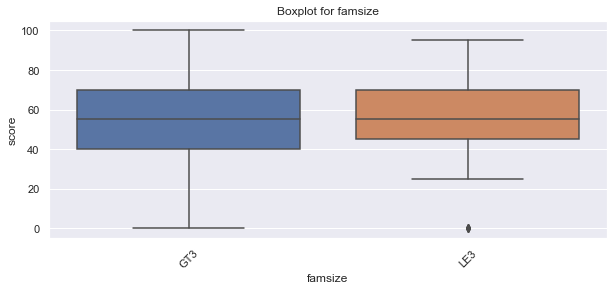

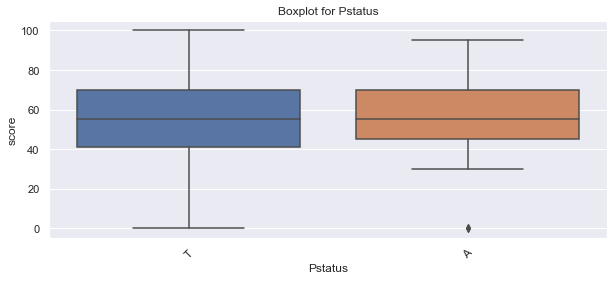

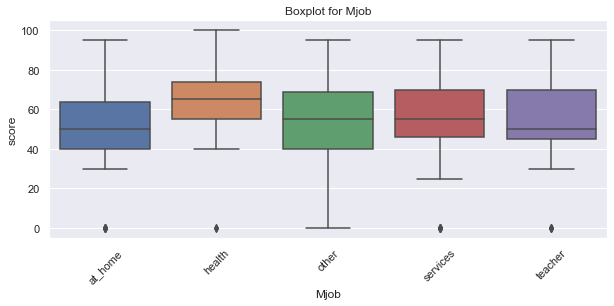

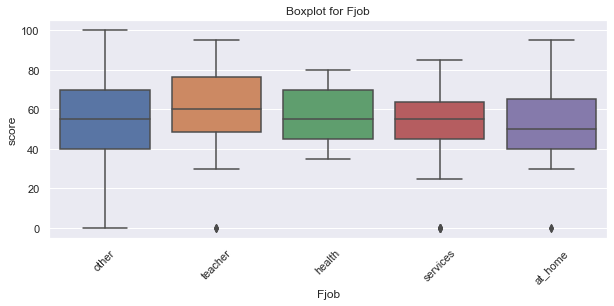

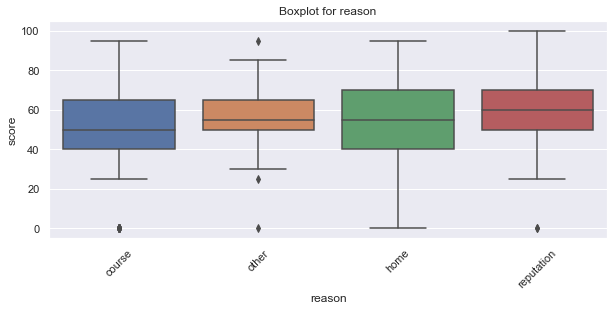

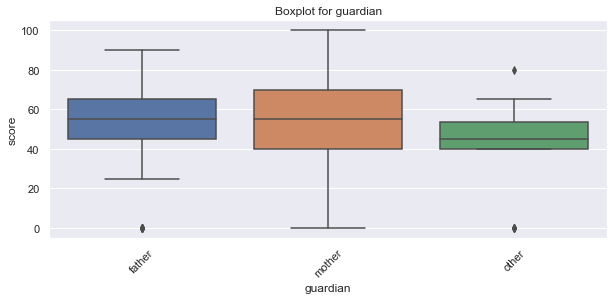

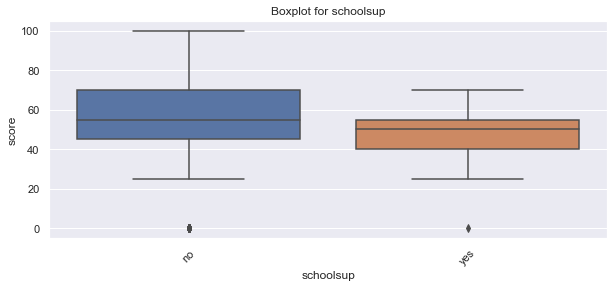

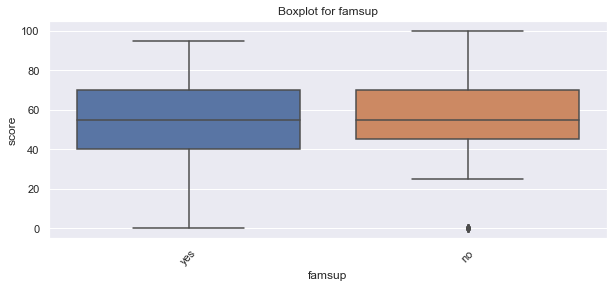

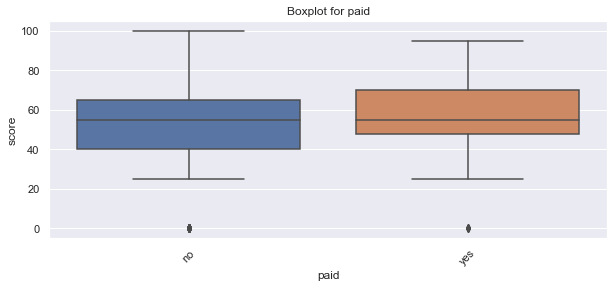

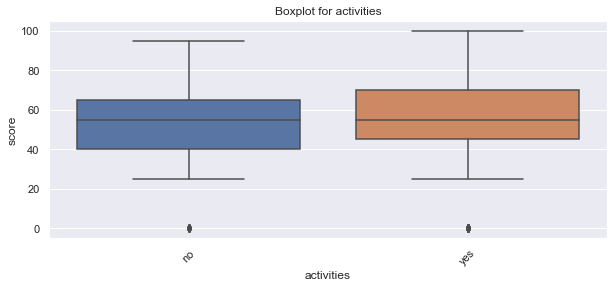

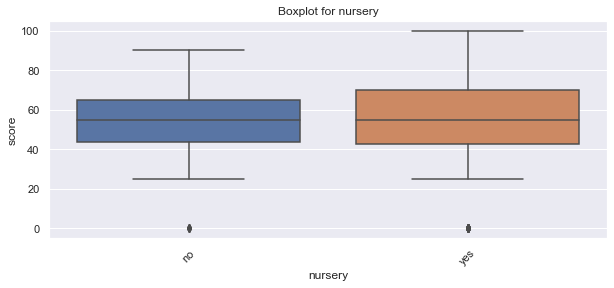

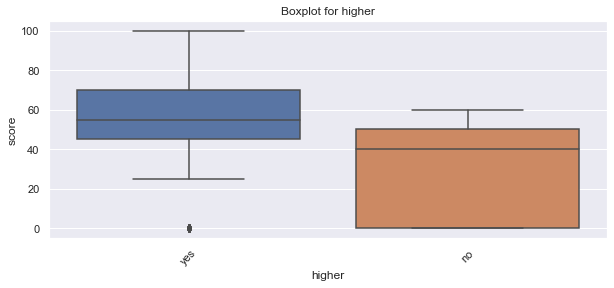

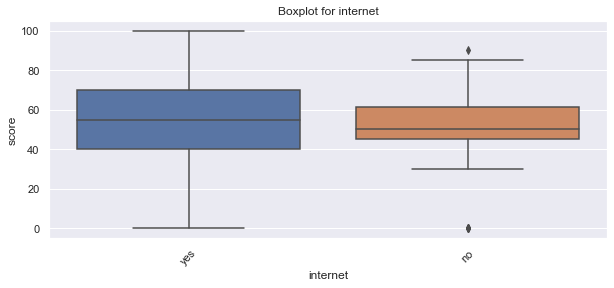

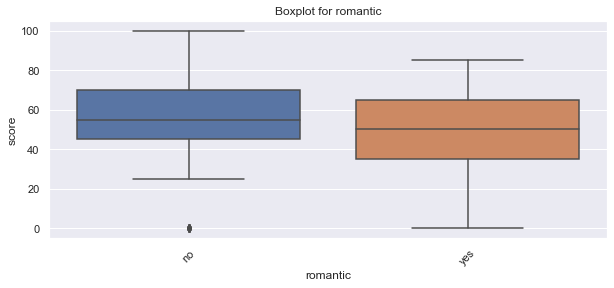

In [85]:
for col in ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery',
            'higher','internet','romantic']:
    get_boxplot(col)

famsize, Pstatus

Общие выводы, которые можно сделать при рассмотрении графиков.
- все признаки вносят вклад в итоговый балл по экзамену, хоть и некоторые совсем незначительный.
- результаты экзаменов лучше:
    - у учеников школы GP
    - у мужчин
    - у учеников, живущих в городе
    - у учеников, чья мать работает в сфере здравоохранения
    - у учеников, чей отец работает учителем
    - учеников, у которых репутация школы стоит на первом месте при выборе школы
    - у учеников с опекуном матерью
    - у учеников без семейной и дополнительной образовательной поддержки (наверное, связано с тем что более сильным ученикам она не требуется)
    - у учеников с дополнительными платными заянятиями по математике
    - у учеников с дополнительными внеучебными занятиями
    - у учеников, посещавших дет. сад
    - у учеников, планирующих получать высшее образование
    - учеников, у которых дома установлен интернет
    - у учеников, не находящихся в романтических отношениях
- признаки, которые практически не вносят вклад в конечную оценку: famsize, Pstatus

Графики являются лишь вспомогательным инструментом, настоящую значимость различий может помочь распознать статистика. Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок батончиков по различным параметрам неразличимы:

In [86]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                        df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [87]:
for col in ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery',
            'higher','internet','romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки reason
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Получили 6 признаков со статистически значимыми различиями значений. Оставляем их в датасете для дальнейшего построения модели.

In [88]:
df_for_model = df.loc[:, ['age','Medu','Fedu','studytime','failures','goout','health','absences','sex','address','reason','paid','higher','romantic']]
display(df_for_model.head())
df_for_model.info()

,age,Medu,Fedu,studytime,failures,goout,health,absences,sex,address,reason,paid,higher,romantic
1,17,1.0,1.0,2.0,0.0,3.0,3.0,4.0,F,U,course,no,yes,no
2,15,1.0,1.0,2.0,3.0,2.0,3.0,10.0,F,U,other,no,yes,no
3,15,4.0,2.0,3.0,0.0,2.0,5.0,2.0,F,U,home,yes,yes,yes
4,16,3.0,3.0,2.0,0.0,2.0,5.0,4.0,F,U,home,yes,yes,no
5,16,4.0,3.0,2.0,0.0,2.0,5.0,10.0,M,U,reputation,yes,yes,no


<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 1 to 394
Data columns (total 14 columns):
age          311 non-null int64
Medu         311 non-null float64
Fedu         311 non-null float64
studytime    311 non-null float64
failures     311 non-null float64
goout        311 non-null float64
health       311 non-null float64
absences     311 non-null float64
sex          311 non-null object
address      311 non-null object
reason       311 non-null object
paid         311 non-null object
higher       311 non-null object
romantic     311 non-null object
dtypes: float64(7), int64(1), object(6)
memory usage: 36.4+ KB


### Вывод:

- Была прозведена первичная обработка данных, заполнены/удалены выбросы/пропуски. 
- Для численных признаков был проведен корреляционный анализ, удалены взаимокеррелирующие независимые признаки, отобраны наиболее значимые для пострения модели признаки. 
- Для номинативных признаков построены графики плотности распределения значений для визуальной оценки признаков, а так же отобраны признаки со статистически значимыми различиями значений с помощью теста Стьюдента.

В итоге получен датасет размерностью 328 строк, 14 столбцов (при изначальном размере 395, 30)